In [ ]:
class Search:
    def __init__(self, keywords):
        self.query = '+'.join(keywords.split(' '))
    
    def data_zip(self, n_round=10):
        import requests
        import time
        import json, os
        import urllib.request
        from bs4 import BeautifulSoup
        from selenium import webdriver
        
        driver = webdriver.Chrome()
        url= f'https://www.google.com/search?q=={self.query}&tbm=isch'
        driver.get(url)
        time.sleep(1)
        driver.find_elements_by_css_selector("#res #rg_s .rg_el")[1].click()
        n_except = 0
        b = 0
        
        for n in range(10):
            try:
                time.sleep(1)
                dom = BeautifulSoup(driver.page_source, "lxml")
                image_url = [_["src"] for _ in dom.select("#irc_cc .irc_mimg a img") if _.has_attr("src")]
                
                
                for a in range(len(image_url)):
                    try:
                        url = image_url[a]
                        outpath = "D:/google_crawling/"
                        outfile = f"img{a+b+1}.jpg"
                        if not os.path.isdir(outpath):
                            os.makedirs(outpath)
                        urllib.request.urlretrieve(url, outpath+outfile)
                    except:
                        pass
                #time.sleep(1)
                b = b+a+1
                driver.find_elements_by_css_selector("#irc-cl #irc-rac")[0].click()
                time.sleep(1)
                driver.find_elements_by_css_selector("#irc-cl #irc-rac")[0].click()
                time.sleep(1)
                driver.find_elements_by_css_selector("#irc-cl #irc-rac")[0].click()
            except:
                print(f'{n}번째에서 failed')
                pass
            
        driver.close()

In [43]:
import requests
import time
import json, os
import urllib.request
import matplotlib
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
from IPython.display import set_matplotlib_formats
from bs4 import BeautifulSoup
from selenium import webdriver

%matplotlib inline
matplotlib.rc('font', family = 'Malgun Gothic')
set_matplotlib_formats('retina')
matplotlib.rc('axes', unicode_minus = False)

In [5]:
driver = webdriver.Chrome()

In [6]:
driver.get("https://section.blog.naver.com/Search/Post.nhn?pageNo=1\
           &rangeType=ALL&orderBy=sim&keyword=제주도 여행")

In [7]:
driver.find_elements_by_css_selector("div.area_list_search > div:nth-child(1) > div > div.info_post > div > a")[0].click()

In [8]:
driver.switch_to.window(driver.window_handles[-1])

In [9]:
driver.switch_to.frame("mainFrame")

In [10]:
dom = BeautifulSoup(driver.page_source, "lxml")

In [11]:
word_list = dom.select(".se-main-container .se-text span")

In [12]:
word_list = [_.text for _ in word_list if _.text != '\u200b']

In [16]:
word_list = "".join(word_list)

In [ ]:
driver.close()
driver.switch_to.window(driver.window_handles[0])

In [22]:
twitter = Twitter()
morphs = []

[morphs.append(_) for _ in twitter.pos(word_list)]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [24]:
print(morphs)

[('슬슬', 'Noun'), ('더운', 'Adjective'), ('여름', 'Noun'), ('휴가', 'Noun'), ('철도', 'Noun'), ('다가오고', 'Verb'), ('올해', 'Noun'), ('는', 'Josa'), ('어디', 'Noun'), ('를', 'Josa'), ('다녀오면', 'Verb'), ('좋을까', 'Adjective'), ('고민', 'Noun'), ('하다가', 'Verb'), ('제주도', 'Noun'), ('로', 'Josa'), ('다녀왔는데요', 'Verb'), ('.', 'Punctuation'), ('확실히', 'Adjective'), ('국내', 'Noun'), ('최대', 'Noun'), ('관광지', 'Noun'), ('인', 'Josa'), ('만큼', 'Noun'), ('어딜', 'Adverb'), ('가도', 'Noun'), ('상당히', 'Adjective'), ('좋았던', 'Adjective'), ('곳', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('많았지만', 'Adjective'), ('무더위', 'Noun'), ('는', 'Josa'), ('물론', 'Adverb'), ('일상', 'Noun'), ('의', 'Josa'), ('스트레스', 'Noun'), ('를', 'Josa'), ('풀어', 'Verb'), ('준', 'Noun'), ('제주도', 'Noun'), ('여행', 'Noun'), ('코스', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('한번', 'Noun'), ('정리', 'Noun'), ('해서', 'Verb'), ('추천', 'Noun'), ('해볼까', 'Verb'), ('합니다', 'Verb'), ('.', 'Punctuation'), ('제일', 'Noun'), ('먼저', 'Noun'), ('이', 'Determiner'), ('곳', 'Noun'), ('에', 'Josa'), ('도착', '

In [40]:
# 명사, 형용사, 부사만 골라내기
# 골라내야 할 것
# "곳", "시간"
noun_adj_adv_list = []

for word, tag in morphs:
    if tag in ['Noun'] and ("것" not in word) and ("내" not in word) and ("나" not in word) and ("수" not in word) and ('게' not in word) and ("말" not in word):
        noun_adj_adv_list.append(word)

In [42]:
# 빈도수
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())

words

{'곳': 15,
 '시간': 9,
 '제주도': 8,
 '여행': 7,
 '코스': 7,
 '사진': 7,
 '구경': 6,
 '다음': 4,
 '도착': 3,
 '방문': 3,
 '제주': 3,
 '모습': 3,
 '기분': 3,
 '산책로': 3,
 '바람': 3,
 '소개': 3,
 '워낙': 3,
 '음료': 3,
 '여름': 2,
 '최대': 2,
 '관광지': 2,
 '한번': 2,
 '먼저': 2,
 '가장': 2,
 '용두암': 2,
 '쭉': 2,
 '요': 2,
 '무엇': 2,
 '경치': 2,
 '추억': 2,
 '담': 2,
 '음식': 2,
 '휴식': 2,
 '제대로': 2,
 '힐링': 2,
 '출발': 2,
 '생각': 2,
 '부지': 2,
 '좀': 2,
 '더': 2,
 '울창': 2,
 '공간': 2,
 '그': 2,
 '도두항': 2,
 '풍경': 2,
 '반짝': 2,
 '사람': 2,
 '층': 2,
 '규모': 2,
 '느낌': 2,
 '중': 2,
 '카페': 2,
 '참고': 2,
 '시작': 2,
 '또한': 2,
 '불꽃': 2,
 '배경': 2,
 '만끽': 2,
 '날': 2,
 '아침': 2,
 '향': 2,
 '마치': 2,
 '녹차': 2,
 '디저트': 2,
 '기도': 2,
 '슬슬': 1,
 '휴가': 1,
 '철도': 1,
 '올해': 1,
 '어디': 1,
 '고민': 1,
 '만큼': 1,
 '가도': 1,
 '무더위': 1,
 '일상': 1,
 '스트레스': 1,
 '준': 1,
 '정리': 1,
 '추천': 1,
 '제일': 1,
 '자마자': 1,
 '공항': 1,
 '해안': 1,
 '도로': 1,
 '남짓': 1,
 '달리': 1,
 '입장료': 1,
 '전혀': 1,
 '밖': 1,
 '장난': 1,
 '전망대': 1,
 '옆쪽': 1,
 '보이': 1,
 '아래': 1,
 '암': 1,
 '바다': 1,
 '정도': 1,
 '절물': 1,
 '자연휴양림': 1,
 '청정': 

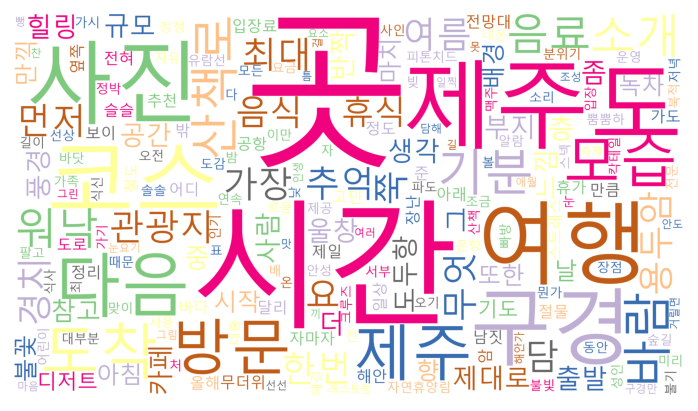

In [45]:
wordcloud = WordCloud(font_path = "C:Windows/Fonts/malgun.ttf", background_color='white', colormap = "Accent_r",
                     width = 3500, height = 2000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [68]:
#driver.switch_to_default_content()

<ipython-input-68-1e095620afd7>:1: DeprecationWarning: use driver.switch_to.default_content instead
  driver.switch_to_default_content()


In [46]:
driver.close()